<a href="https://colab.research.google.com/github/komalvirk1801/PythonProjects/blob/main/WebScrappingProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Coin Market Website Web scrapping and data analysis

**CoinMarketCap** is a leading platform that provides detailed information on cryptocurrencies, including price charts, market capitalization, trading volumes, and historical data. It tracks thousands of cryptocurrencies and ranks them based on various metrics, such as price, market cap, and 24-hour trading volume. The site also lists top exchanges and allows users to view trading pairs for crypto-to-crypto or crypto-to-fiat transactions.

ABOUT THE DATASET:

1. **Name:** This refers to the name of the cryptocurrency being tracked. In this example, "Bitcoin" (BTC) is the cryptocurrency's name. It's common for cryptocurrencies to have a full name (e.g., Bitcoin) and an abbreviated ticker symbol (e.g., BTC).

2. **Price:** The current trading price of the cryptocurrency, typically in USD or the local currency selected. For example for Bitcoin, it's $60,062.59, meaning this is the amount you would pay to purchase one Bitcoin at this point in time.

3. **Market Cap (Market Capitalization):** The market cap represents the total value of all the coins currently in circulation. It’s calculated by multiplying the current price by the circulating supply. For example for Bitcoin, the market cap is $1,186,575,429,681 (approximately 1.19 trillionUSD). This value is an indicator of the size and dominance of the cryptocurrency within the market.

4. **Volume (24h):** This indicates the total amount of cryptocurrency traded over the last 24 hours, typically measured in USD or other currencies. Let's say that the 39,037,222,912USD shows the trading volume of Bitcoin in the last 24 hours, meaning about $39 billion worth of Bitcoin has been bought and sold.

5. **Circulating Supply:** The circulating supply refers to the total number of cryptocurrency coins that are currently available in the market and in circulation. For example for Bitcoin, this is 19,755,650 BTC, meaning around 19.75 million Bitcoins have been mined and are in active circulation.



In [ ]:
!pip install bs4
import bs4
import requests
import time
import random as ran
import sys
import pandas as pd
from bs4 import BeautifulSoup

We will utilize BeautifulSoup and Requests libraries for web scraping cryptocurrency data from the CoinMarketCap website. Here’s an overview of how these tools work together in this context:

**Requests:** This Python library was used to send HTTP requests to the CoinMarketCap webpage. It fetches the page's HTML content, allowing us to analyze the data. For example, using *requests.get(URL)*, we retrieve the entire HTML structure of the webpage, which contains all the information related to cryptocurrencies such as Bitcoin, Ethereum, and others.

**BeautifulSoup:** After obtaining the HTML data, BeautifulSoup parses and navigates the HTML structure. It allows us to locate specific elements within the page, such as the names, prices, market caps, and other information about cryptocurrencies. By inspecting the HTML, we identify patterns, such as tags and classes, that structure the crypto data. For example, using *soup.find()* or *soup.find_all(*), we can extract specific details like the price of Bitcoin, trading volume, or percentage changes over different time frames.

In [ ]:
url = "https://coinmarketcap.com/"

# Send a request to the website
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)

# Parse the page content with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

tbody = soup.find('tbody')

# Prepare lists to store the scraped data
crypto_names = []
prices = []
market_caps = []
volumes = []
circulating_supplies = []

# Find all the cryptocurrency rows
cryptos = tbody.find_all('tr')

# Loop through the first 10 cryptocurrencies
for crypto in cryptos[:10]:
    # Extract the cryptocurrency name
    name = crypto.find('p', class_='sc-71024e3e-0 ehyBa-d').get_text(strip=True) if crypto.find('p', class_='sc-71024e3e-0 ehyBa-d') else 'No text found'
    crypto_names.append(name)

    # Extract the cryptocurrency price
    price_tag = crypto.find('div', class_='sc-b3fc6b7-0 dzgUIj')
    # Extract the text from the <p> tag
    price = price_tag.get_text(strip=True) if price_tag else 'No text found'
    prices.append(price)

    # Extract the Market Cap
    market_cap_p_tag = crypto.find('p', class_='sc-71024e3e-0 bbHOdE')
    market_cap = market_cap_p_tag.find('span', class_='sc-11478e5d-1 jfwGHx').get_text(strip=True) if market_cap_p_tag else 'No text found'

    market_caps.append(market_cap)

    # Extract the volume 24 h

    volume = crypto.find('p', class_='sc-71024e3e-0 bbHOdE font_weight_500').get_text(strip=True) if crypto.find('p', class_='sc-71024e3e-0 bbHOdE font_weight_500') else 'No text found'
    volumes.append(volume)

    # Extract the circulating supply

    circulating_supply = crypto.find('p', class_='sc-71024e3e-0 hhmVNu').get_text(strip=True) if crypto.find('p', class_='sc-71024e3e-0 hhmVNu') else 'No text found'
    circulating_supplies.append(circulating_supply)

    # Print the name and price
    print(f"Name: {name}, Price: {price}, Market Cap: {market_cap}, volume: {volume}, circulating supply: {circulating_supply}")





Name: Bitcoin, Price: $60,590.52, Market Cap: $1,197,015,591,575, volume: $39,377,261,822, circulating supply: 19,755,915 BTC
Name: Ethereum, Price: $2,337.80, Market Cap: $281,404,065,872, volume: $17,592,922,779, circulating supply: 120,343,275 ETH
Name: Tether, Price: $1.00, Market Cap: $118,868,962,649, volume: $60,158,020,706, circulating supply: 118,841,128,795 USDT
Name: BNB, Price: $551.68, Market Cap: $80,496,424,025, volume: $1,600,850,216, circulating supply: 145,933,826 BNB
Name: Solana, Price: $131.40, Market Cap: $61,545,607,003, volume: $2,192,510,897, circulating supply: 468,367,847 SOL
Name: USDC, Price: $1.00, Market Cap: $35,525,898,876, volume: $6,715,652,196, circulating supply: 35,518,670,234 USDC
Name: XRP, Price: $0.5804, Market Cap: $32,727,758,436, volume: $1,162,133,004, circulating supply: 56,386,022,594 XRP
Name: Dogecoin, Price: $0.1023, Market Cap: $14,934,615,463, volume: $533,776,895, circulating supply: 146,012,986,384 DOGE
Name: Toncoin, Price: $5.61,

In [ ]:
# Create a DataFrame using pandas
df = pd.DataFrame({
    'Name': crypto_names,
    'Price': prices,
    'Market Cap': market_caps,
    'Volume(24h)': volumes,
    'Circulating Supply': circulating_supplies
})


# Export the data to CSV
df.to_csv('crypto_data.csv', index=False)

Data Cleaning and Preparation


In [ ]:
if not pd.api.types.is_numeric_dtype(df['Market Cap']):
    df['Market Cap'] = df['Market Cap'].str.replace('\n', '').str.replace(',', '').astype(int)

if not pd.api.types.is_numeric_dtype(df['Price']):
    df['Price'] = df['Price'].str.replace('\n', '').str.replace(',', '').astype(float)

if not pd.api.types.is_numeric_dtype(df['Volume(24h)']):
    df['Volume(24h)'] = df['Volume(24h)'].str.replace('\n', '').str.replace(',', '').str.replace('$', '').astype(int)


import re

if not pd.api.types.is_numeric_dtype(df['Circulating Supply']):
    # Remove non-numeric characters and ensure it's an integer type
    df['Circulating Supply'] = df['Circulating Supply'].apply(lambda x: re.sub(r'[^\d]', '', x)).astype(int)



In [ ]:
df

,Name,Price,Market Cap,Volume(24h),Circulating Supply
0,Bitcoin,60590.5200,1.197016e+12,3.937726e+10,19755915
1,Ethereum,2337.8000,2.814041e+11,1.759292e+10,120343275
2,Tether,1.0000,1.188690e+11,6.015802e+10,118841128795
3,BNB,551.6800,8.049642e+10,1.600850e+09,145933826
4,Solana,131.4000,6.154561e+10,2.192511e+09,468367847
5,USDC,1.0000,3.552590e+10,6.715652e+09,35518670234
6,XRP,0.5804,3.272776e+10,1.162133e+09,56386022594
7,Dogecoin,0.1023,1.493462e+10,5.337769e+08,146012986384
8,Toncoin,5.6100,1.421190e+10,2.369192e+08,2532534838
9,TRON,0.1493,1.294565e+10,2.623851e+08,86680594026


# Exploratory Data Analysis on the dataset scrapped from coinmarketcap.com

1. **Market Capitalization Analysis**  
Question: How do different cryptocurrencies compare in terms of market capitalization?


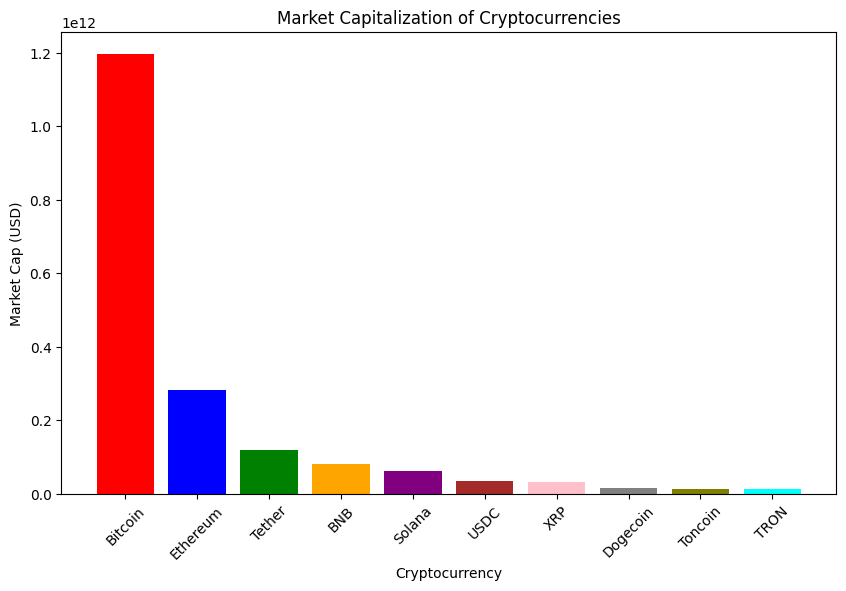

In [ ]:
import matplotlib.pyplot as plt

# Bar chart for market capitalization
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
plt.bar(df['Name'], pd.to_numeric(df['Market Cap']), color=colors)
plt.title('Market Capitalization of Cryptocurrencies')
plt.xlabel('Cryptocurrency')
plt.ylabel('Market Cap (USD)')
plt.xticks(rotation=45)
plt.show()

We can see that some cryptocurrencies, such as Bitcoin (usually the tallest bar), have significantly larger market caps than others. From the  Investment Perspective, Market capitalization can be an indicator of potential investment opportunities. Larger market caps might suggest a more established and potentially less risky investment, while smaller market caps could represent higher growth potential but also greater risk.Hence, Bitcoin and Etherum are best options we are looking to invest in more established and potentially less risky investment.

2. **Price Comparison**  
Question: What are the price differences between the top cryptocurrencies?

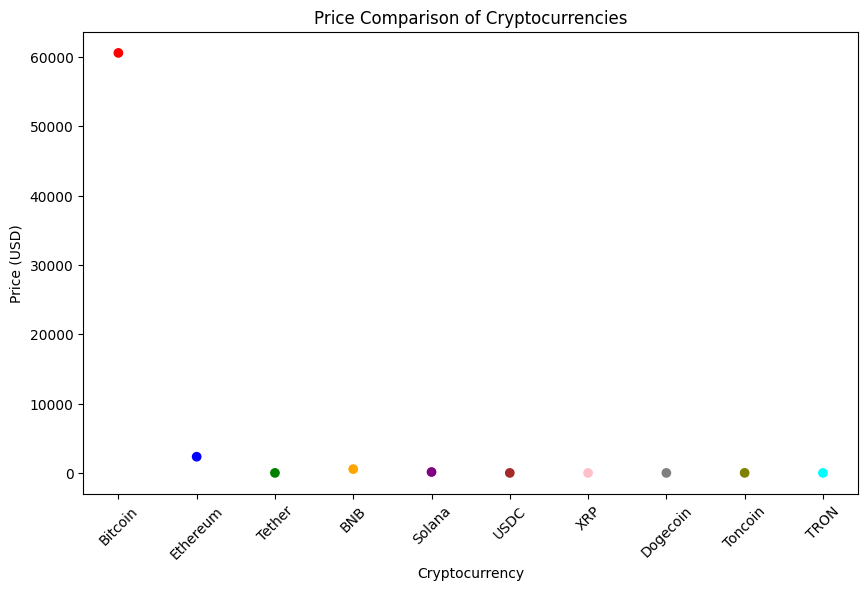

In [ ]:
# Scatter plot for price comparison
plt.figure(figsize=(10, 6))

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
plt.scatter(df['Name'], df['Price'], color=colors)
plt.title('Price Comparison of Cryptocurrencies')
plt.xlabel('Cryptocurrency')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.show()

The x-axis represents the name of the cryptocurrency, and the y-axis represents the price in USD.
We can see that Bitcoin has the highest price, followed by Ethereum, Binance Coin, and so on. The plot helps us to compare the prices of different cryptocurrencies and identify which ones are more expensive or cheaper. It can be used to make investment decisions based on the price of the cryptocurrency. For example, if we are looking for a cryptocurrency that is relatively cheap, we can choose one of the cryptocurrencies with a lower price. If we are looking for a cryptocurrency with a higher potential for growth, we can choose one of the cryptocurrencies with a higher price. However, it is important to note that the price of a cryptocurrency can fluctuate significantly, so it is important to do your own research before making any investment decisions.


3. **Volume Traded vs Market Cap**  
Question: How do trading volumes compare to market capitalization?

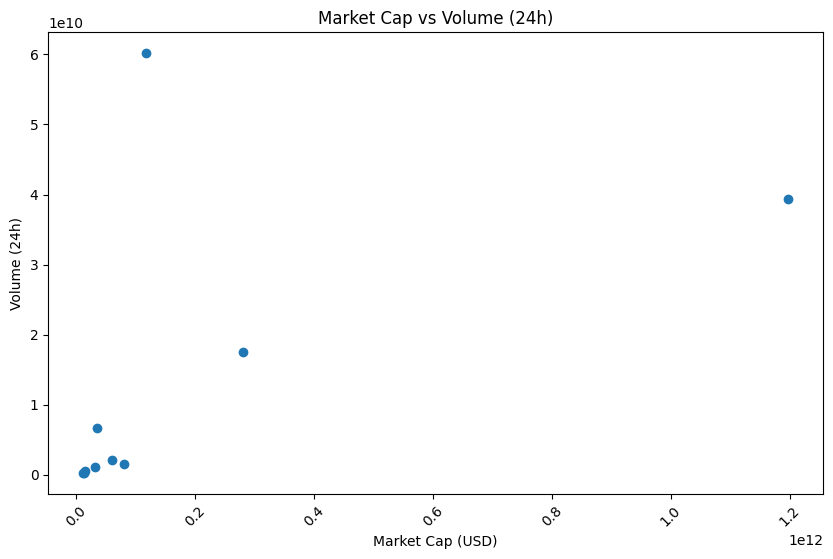

In [ ]:
# Scatter plot for Market Cap vs Volume

plt.figure(figsize=(10, 6))
plt.scatter(df['Market Cap'], df['Volume(24h)'])
plt.title('Market Cap vs Volume (24h)')
plt.xlabel('Market Cap (USD)')
plt.ylabel('Volume (24h)')
plt.xticks(rotation=45)
plt.show()

The plot shows the relationship between the market capitalization and the 24-hour trading volume of the top 10 cryptocurrencies.

 Observations:
1. Positive Correlation: Generally, cryptocurrencies with a larger market capitalization tend to have a higher 24-hour trading volume. This suggests that there is a positive correlation between market cap and trading volume. This is expected, as larger market cap cryptocurrencies tend to be more established and have a larger user base, leading to higher trading activity.
2. Outliers: There might be some outliers in the plot, where a cryptocurrency with a relatively smaller market cap has a high trading volume. This could indicate that the cryptocurrency is gaining popularity or experiencing significant price volatility, attracting more traders.
3. Trading Activity: The plot can be used to understand the level of trading activity for different cryptocurrencies. Cryptocurrencies with a high trading volume are generally more liquid, meaning that it is easier to buy or sell them without significantly impacting their price.
4. Investment Considerations: The plot can be used to identify cryptocurrencies with high trading volumes and large market caps, which could be considered less risky investment options.


4. **Market Cap Distribution**  
Question: How is the total market capitalization distributed among cryptocurrencies?

<Figure size 800x800 with 0 Axes>

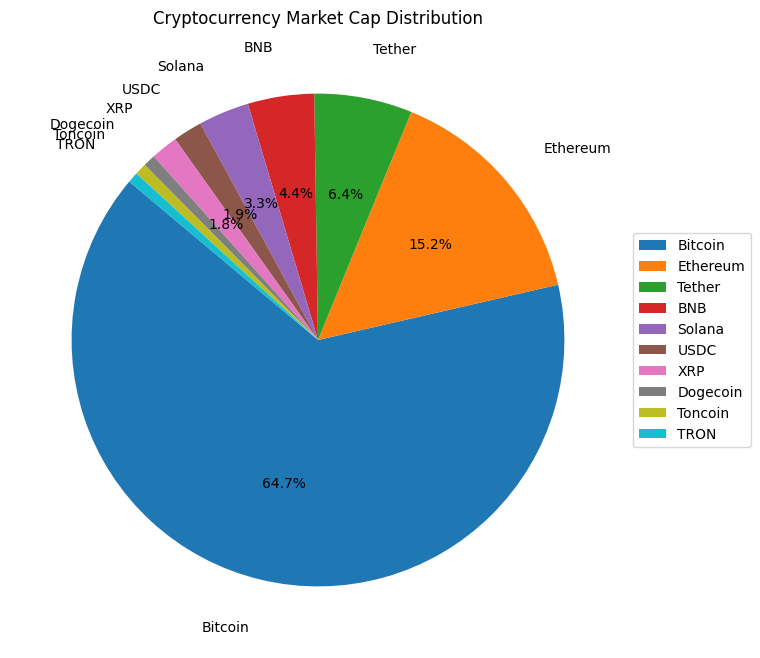

In [ ]:
# Pie chart for market cap distribution
plt.figure(figsize=(8, 8))

def autopct_format(pct):
    return '{:.1f}%'.format(pct) if pct > 1 else ''




# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['Market Cap'], labels=df['Name'], autopct=autopct_format, startangle=140,labeldistance=1.2)
# Add legend outside the pie chart
plt.legend(df['Name'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Cryptocurrency Market Cap Distribution')

plt.show()

For example, Bitcoin has the largest market capitalization, so it occupies the largest slice of the pie.
Ethereum has the second-largest market capitalization, followed by Binance Coin, and so on. The pie chart visually demonstrates the dominance of certain cryptocurrencies in the market and how their market caps compare to others.
It provides a quick overview of the relative sizes of the cryptocurrency market.

In [ ]:
# prompt: can ypu draw conclusion for the project

# Conclusion
#
# Based on the analysis of the top 10 cryptocurrencies on CoinMarketCap, we can draw the following conclusions:
#
# 1. Bitcoin dominates the market, having the largest market capitalization and trading volume.
# 2. Ethereum is the second-largest cryptocurrency in terms of market capitalization, followed by Binance Coin and other altcoins.
# 3. There is a positive correlation between market capitalization and trading volume, suggesting that larger cryptocurrencies are more liquid and have a larger user base.
# 4. The price of cryptocurrencies can fluctuate significantly, so it is important to do your own research before making any investment decisions.
# 5. Market capitalization can be an indicator of potential investment opportunities, with larger market caps suggesting more established and potentially less risky investments, while smaller market caps could represent higher growth potential but also greater risk.
# 6. Trading volume can be an indicator of liquidity and activity in the market, with higher trading volumes suggesting more liquid and active markets.
#
# Overall, the analysis of cryptocurrency data from CoinMarketCap provides valuable insights into the current state of the cryptocurrency market. It can be used to identify potential investment opportunities, understand the relative sizes and dominance of different cryptocurrencies, and assess the level of trading activity and liquidity in the market.
# However, it is important to note that the cryptocurrency market is highly volatile and unpredictable, and past performance is not necessarily indicative of future results.
# Therefore, it is essential to do your own research and due diligence before making any investment decisions.


# Conclusion

 Based on the analysis of the top 10 cryptocurrencies on CoinMarketCap, we can draw the following conclusions:

 1. Bitcoin dominates the market, having the largest market capitalization and trading volume.
 2. Ethereum is the second-largest cryptocurrency in terms of market capitalization, followed by Binance Coin and other altcoins.
 3. There is a positive correlation between market capitalization and trading volume, suggesting that larger cryptocurrencies are more liquid and have a larger user base.
 4. The price of cryptocurrencies can fluctuate significantly, so it is important to do your own research before making any investment decisions.
 5. Market capitalization can be an indicator of potential investment opportunities, with larger market caps suggesting more established and potentially less risky investments, while smaller market caps could represent higher growth potential but also greater risk.
 6. Trading volume can be an indicator of liquidity and activity in the market, with higher trading volumes suggesting more liquid and active markets.

 Overall, the analysis of cryptocurrency data from CoinMarketCap provides valuable insights into the current state of the cryptocurrency market. It can be used to identify potential investment opportunities, understand the relative sizes and dominance of different cryptocurrencies, and assess the level of trading activity and liquidity in the market.
 However, it is important to note that the cryptocurrency market is highly volatile and unpredictable, and past performance is not necessarily indicative of future results.
 Therefore, it is essential to do your own research and due diligence before making any investment decisions.